<a href="https://colab.research.google.com/github/dogukartal/IBM_AI_Labs/blob/main/Introduction%20to%20Neural%20Networks%20and%20PyTorch/Linear%20Regression/Linear_Regression_with_One_Parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
class plot_diagram():

    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(X.numpy()))
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values]
        w.data = start

    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)
        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()

    # Destructor
    def __del__(self):
        plt.close('all')

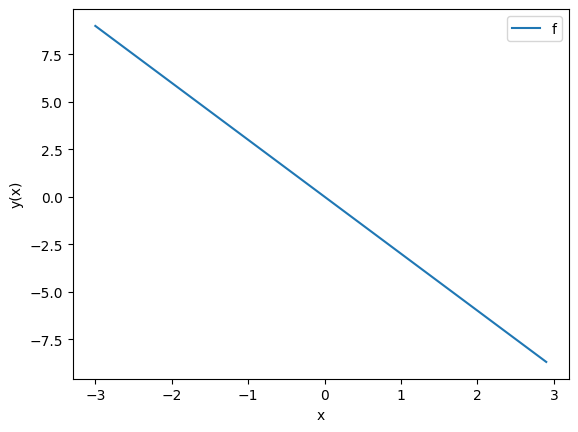

In [7]:
# Create the f(X) with a slope of -3
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.show()

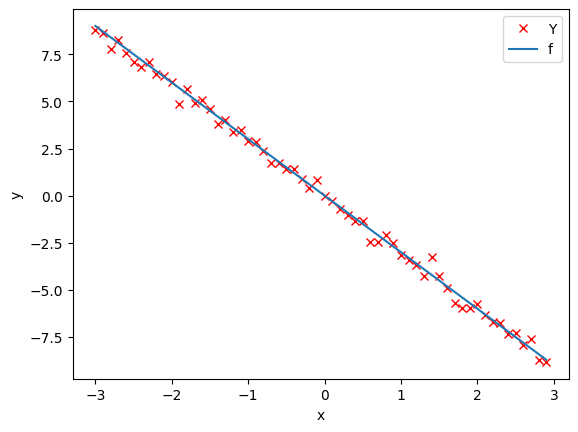

In [9]:
Y = f + 0.3 * torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<class 'numpy.ndarray'>


<ipython-input-2-1149ae543073>:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


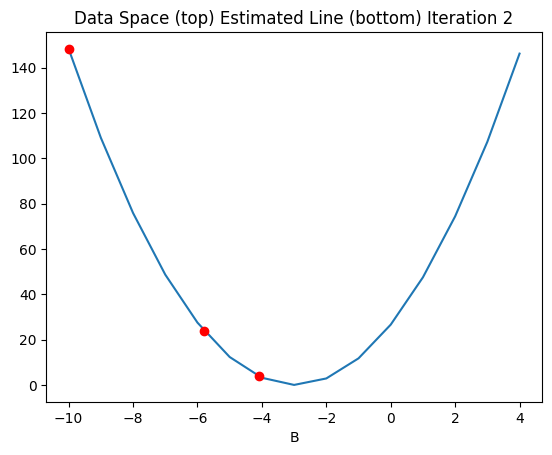

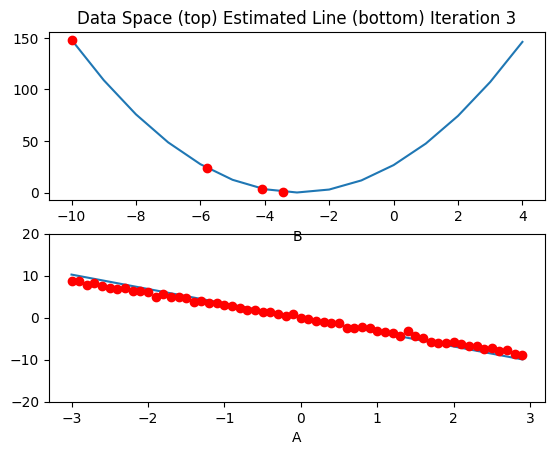

<Figure size 640x480 with 0 Axes>

In [12]:
# Forward model
def forward(x):
    return w * x

# Cost
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

# Training
def train_model(iter):
    for epoch in range (iter):
        Yhat = forward(X) # Prediction
        loss = criterion(Yhat,Y) # Calculate cost
        gradient_plot(Yhat, w, loss.item(), epoch) # Plot
        LOSS.append(loss.item()) # Log loss
        loss.backward() # Compute gradient of the loss with respect to all the learnable parameters
        w.data = w.data - lr * w.grad.data # Update parameters
        w.grad.data.zero_() # Zero the gradient

# Parameters
lr = 0.1
LOSS = []

# Model
w = torch.tensor(-10.0, requires_grad = True)

# Plotting object
gradient_plot = plot_diagram(X, Y, w, stop = 5)

# Train
train_model(4)

Text(38.347222222222214, 0.5, 'Cost')

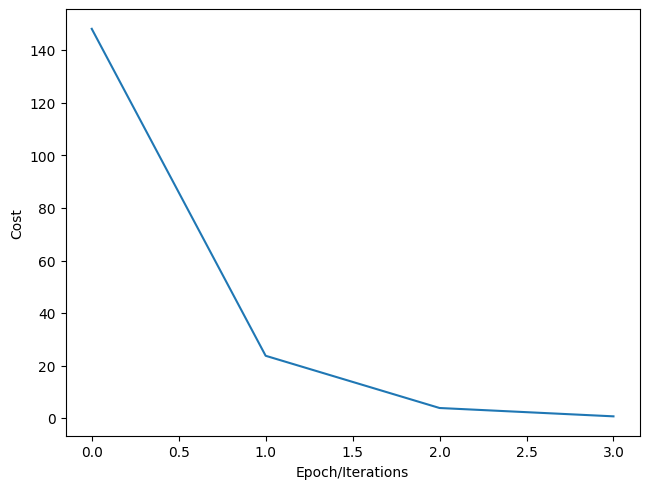

In [13]:
# Plot the loss for each iteration
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")